<a href="https://colab.research.google.com/github/arun-arunisto/OpenCVTutorialAbel/blob/main/Tutorial6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

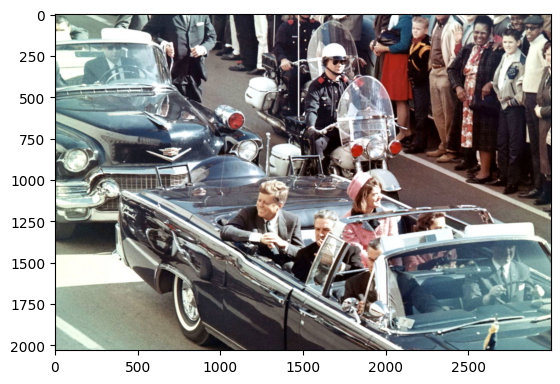

In [2]:
#original image
base_image = cv2.imread("/content/drive/MyDrive/AbelFolder/jfk.jpg")
plt.imshow(base_image[:, :, ::-1])

In [3]:
no = [i for i in range(10)]
no

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
zero_to_255 = np.arange(0, 256)
zero_to_255

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## For Explanation


In [5]:
inv_gamma = 1.0/1.5
inv_gamma

0.6666666666666666

In [7]:
list_of_i = [i/255 for i in np.arange(0, 256)]
list_of_i

[0.0,
 0.00392156862745098,
 0.00784313725490196,
 0.011764705882352941,
 0.01568627450980392,
 0.0196078431372549,
 0.023529411764705882,
 0.027450980392156862,
 0.03137254901960784,
 0.03529411764705882,
 0.0392156862745098,
 0.043137254901960784,
 0.047058823529411764,
 0.050980392156862744,
 0.054901960784313725,
 0.058823529411764705,
 0.06274509803921569,
 0.06666666666666667,
 0.07058823529411765,
 0.07450980392156863,
 0.0784313725490196,
 0.08235294117647059,
 0.08627450980392157,
 0.09019607843137255,
 0.09411764705882353,
 0.09803921568627451,
 0.10196078431372549,
 0.10588235294117647,
 0.10980392156862745,
 0.11372549019607843,
 0.11764705882352941,
 0.12156862745098039,
 0.12549019607843137,
 0.12941176470588237,
 0.13333333333333333,
 0.13725490196078433,
 0.1411764705882353,
 0.1450980392156863,
 0.14901960784313725,
 0.15294117647058825,
 0.1568627450980392,
 0.1607843137254902,
 0.16470588235294117,
 0.16862745098039217,
 0.17254901960784313,
 0.17647058823529413,
 0.

In [9]:
with_power_off = [((i/255)**inv_gamma)*255 for i in np.arange(0, 256)]
with_power_off

[0.0,
 6.341325705384999,
 10.066227095601132,
 13.19048901647454,
 15.979139480908028,
 18.54214884633095,
 20.938596140726663,
 23.20484936283077,
 25.36530282153999,
 27.43732282131251,
 29.433826584416686,
 31.36475144495495,
 33.237949540526785,
 35.05976184526698,
 36.835402289321166,
 38.56922385987353,
 40.26490838240452,
 41.925605263617996,
 43.554035109742564,
 45.1525685647895,
 46.7232872835526,
 48.26803177598057,
 49.78843943844259,
 51.28597513779198,
 52.761956065898154,
 54.217572131254926,
 55.65390283493135,
 57.07193134846498,
 58.472556343740244,
 59.856602001036286,
 61.224826528760225,
 62.57792945827387,
 63.91655792363211,
 65.24131209469463,
 66.55274989987069,
 67.8513911494747,
 69.13772115066524,
 70.41219388899623,
 71.6752348388131,
 72.92724345439224,
 74.16859538532378,
 75.39964445277444,
 76.62072441762604,
 77.83215056682863,
 79.03422114043876,
 80.22721861859046,
 81.41141088494591,
 82.58705228090142,
 83.75438456290665,
 84.91363777362956,
 86.0

In [10]:
#adjust the brightness gamma
#function for creating image with different exposure
def adjust_gamma(image, gamma):
  inv_gamma = 1.0/gamma
  table = np.array([(((i/255)) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
  return cv2.LUT(image, table)


In [11]:
#different exposures
exposure_025 = adjust_gamma(base_image, 0.25) #stimulate underexposed (darker)
exposure_05 = adjust_gamma(base_image, 0.5)
exposure_08 = adjust_gamma(base_image, 0.8)
exposure_15 = adjust_gamma(base_image, 1.5) #stimulate overexposed (brighter)

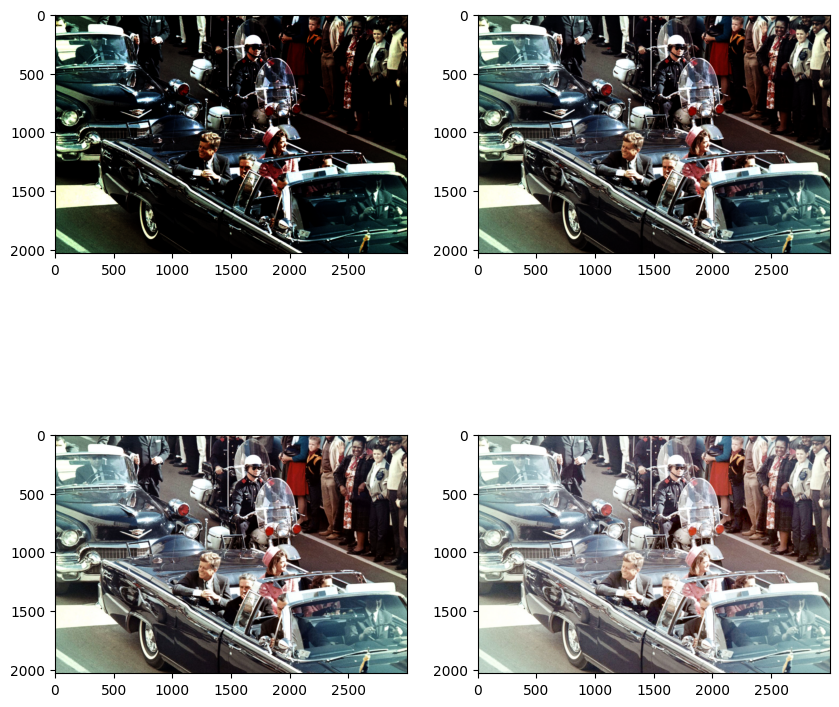

In [12]:
#images on a list
images = [exposure_025, exposure_05, exposure_08, exposure_15]

plt.figure(figsize=[10, 10])
num_of_rows = math.ceil(4/2)
for i in range(len(images)):
  plt.subplot(num_of_rows, 2, i+1)
  plt.imshow(images[i][:, :, ::-1])

In [13]:
import sys

sys.getsizeof(base_image)

18279144

In [14]:
#list of different exposure times
times = np.array([1/0.25, 0.5, 0.8, 1.5], dtype=np.float32)

In [15]:
#align the images
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

In [16]:
#crf (camera response function)
calibrate = cv2.createCalibrateDebevec()
response = calibrate.process(images, times)

#graph elements
x = np.arange(256, dtype=np.float32)
y = np.squeeze(response)

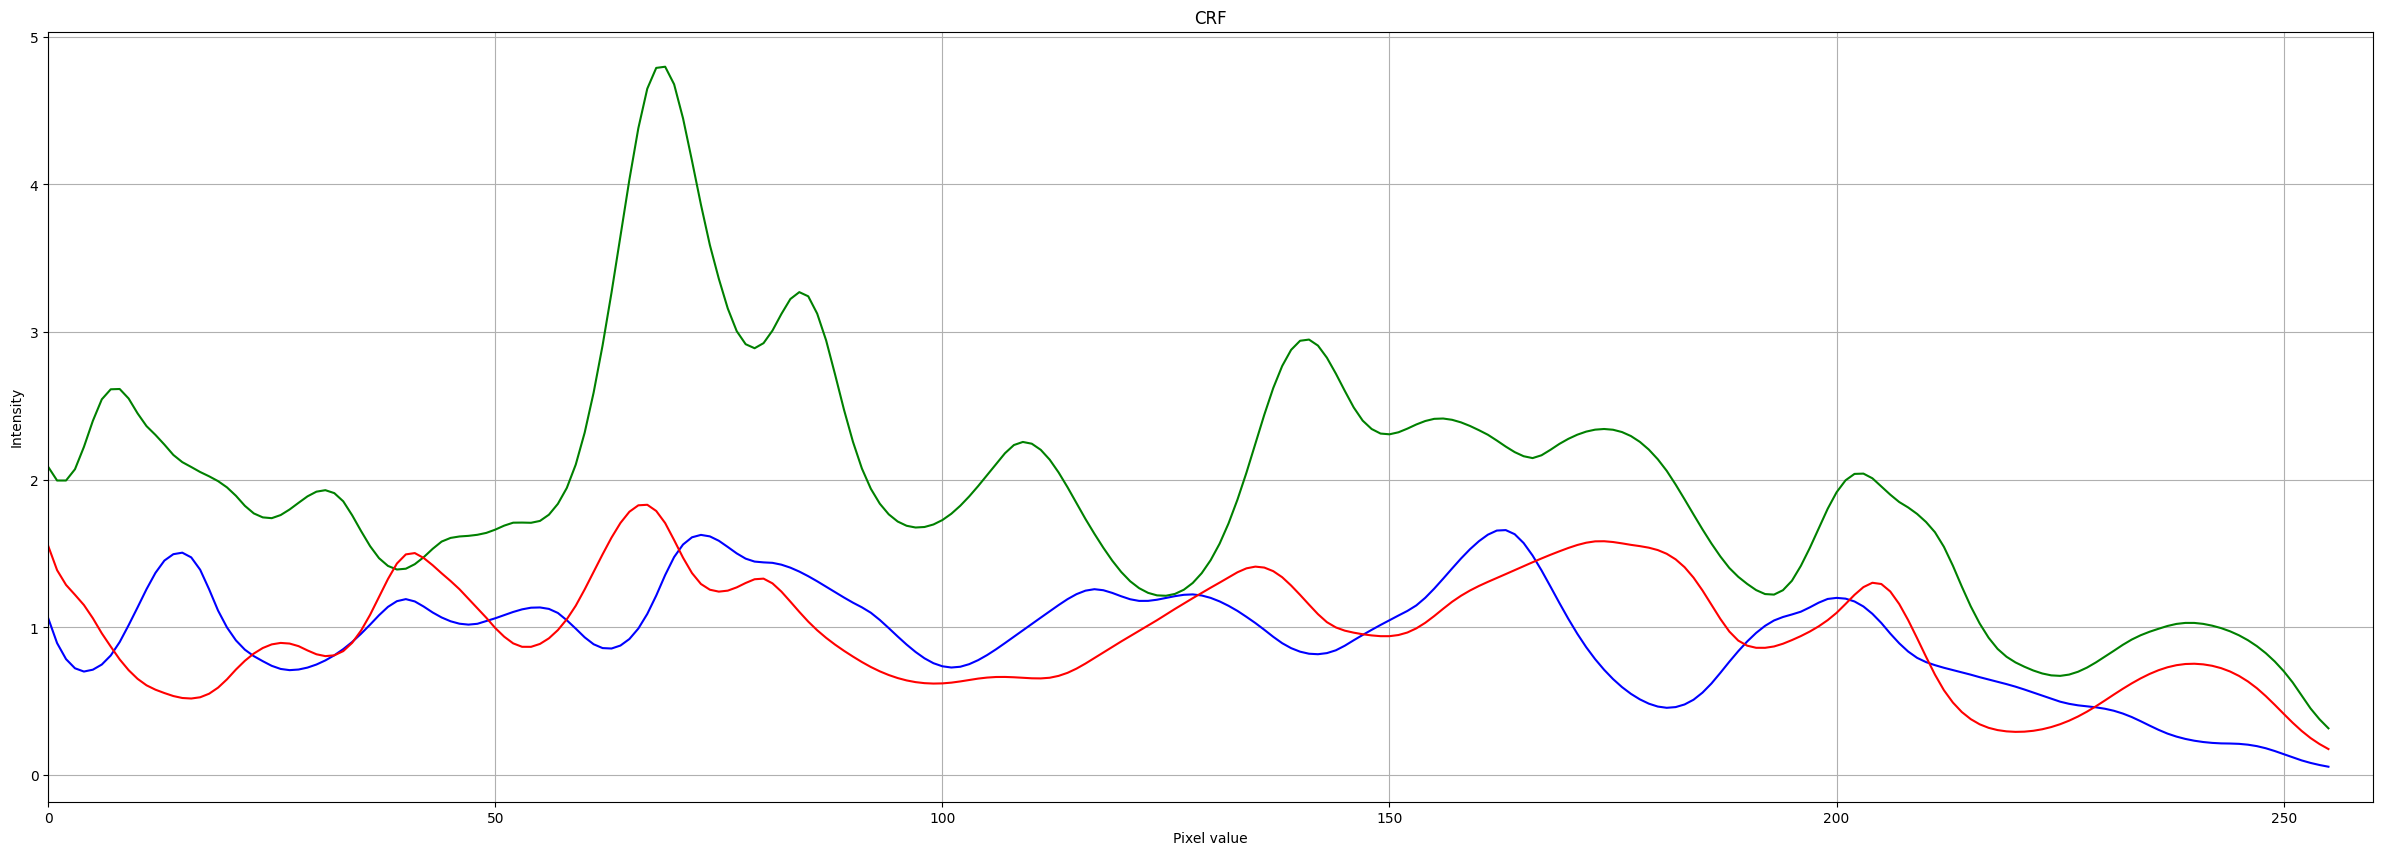

In [17]:
ax = plt.figure(figsize=[30, 10])
plt.title("CRF")
plt.xlabel("Pixel value")
plt.ylabel("Intensity")
plt.xlim([0, 260])
plt.grid()
plt.plot(x, y[:, 0], "b", x, y[:, 1], "g", x, y[:, 2], "r")

In [18]:
#merging this exposures to get a HDR image
merged_dev = cv2.createMergeDebevec()
hdr_result = merged_dev.process(images, times, response)

In [26]:
#drago algoirthm
tonemap_drago = cv2.createTonemapDrago(1.0, 0.7)
result_drago = tonemap_drago.process(hdr_result)
result_drago = 3*result_drago

In [27]:
result_drago

array([[[1.2943221, 2.3074818, 1.6501508],
        [1.2943221, 2.3074818, 1.6501508],
        [1.2713184, 2.3053772, 1.6131935],
        ...,
        [1.437675 , 2.589137 , 1.651727 ],
        [1.4454328, 2.2919853, 1.5030508],
        [1.5217683, 2.4617367, 1.4341928]],

       [[1.2713184, 2.3053772, 1.6131935],
        [1.2539229, 2.3058364, 1.5956562],
        [1.231686 , 2.2793572, 1.5843598],
        ...,
        [1.437675 , 2.589137 , 1.651727 ],
        [1.4454328, 2.2919853, 1.5030508],
        [1.5217683, 2.4617367, 1.4341928]],

       [[1.2333969, 2.2794402, 1.5300231],
        [1.2272105, 2.243872 , 1.5196419],
        [1.2221812, 2.234726 , 1.5022762],
        ...,
        [1.4551752, 2.6437917, 1.6441364],
        [1.460748 , 2.299119 , 1.5022156],
        [1.5644349, 2.3951583, 1.4394953]],

       ...,

       [[1.6200846, 2.5974836, 1.2651631],
        [1.6034975, 2.6414804, 1.271723 ],
        [1.5645915, 2.6805885, 1.2847952],
        ...,
        [1.4099684, 2.3528

In [28]:
final_drago = np.clip(result_drago, 0, 1)

In [29]:
final_drago

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

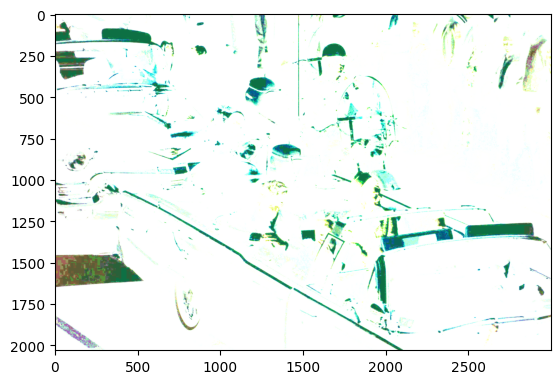

In [30]:
plt.imshow(final_drago)

In [31]:
cv2.imwrite("final_drago.jpg", result_drago*255)

True

In [ ]:
#reinhard
cv2.createTonemapReinhard(1.5, 0, 0, 0)
#mantuik
cv2.createTonemapMantiuk(2.2, 0.85, 1.2)